In [12]:
import sys
import os
sys.path.append(os.path.abspath(".."))


In [13]:
from src.data_preparation import load_preprocess_data, create_sequences


In [16]:
scaler, data_scaled, labels = load_preprocess_data("C:/Users/Lenovo/Desktop/financial-anomaly-lstm-autoencoder/data/raw/creditcard.csv")
print("Scaled data shape: ", data_scaled.shape)
print("Labeled data shape: ", labels.shape)

Scaled data shape:  (284807, 30)
Labeled data shape:  (284807,)


In [17]:
X, y = create_sequences(data=data_scaled, labels=labels)
print("Sequences shape:", X.shape)
print("Sequence labels shape:", y.shape)

Sequences shape: (284797, 10, 30)
Sequence labels shape: (284797,)


In [18]:
print("First sequence: ", X[0])
print("First sequence label: ", y[0])

First sequence:  [[0.00000000e+00 9.35192337e-01 7.66490419e-01 8.81364903e-01
  3.13022659e-01 7.63438735e-01 2.67668642e-01 2.66815176e-01
  7.86444198e-01 4.75311734e-01 5.10600482e-01 2.52484319e-01
  6.80907625e-01 3.71590602e-01 6.35590530e-01 4.46083696e-01
  4.34392391e-01 7.37172553e-01 6.55065861e-01 5.94863228e-01
  5.82942230e-01 5.61184389e-01 5.22992116e-01 6.63792975e-01
  3.91252676e-01 5.85121795e-01 3.94556792e-01 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [0.00000000e+00 9.78541955e-01 7.70066651e-01 8.40298490e-01
  2.71796491e-01 7.66120336e-01 2.62191698e-01 2.64875439e-01
  7.86298353e-01 4.53980968e-01 5.05267346e-01 3.81187722e-01
  7.44341569e-01 4.86190176e-01 6.41219007e-01 3.83839664e-01
  4.64105178e-01 7.27793983e-01 6.40681094e-01 5.51930422e-01
  5.79529753e-01 5.57839915e-01 4.80236960e-01 6.66937823e-01
  3.36439996e-01 5.87290252e-01 4.46012969e-01 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [3.12500000e-02 9.35217023e-01 7.53117667e-01 8.

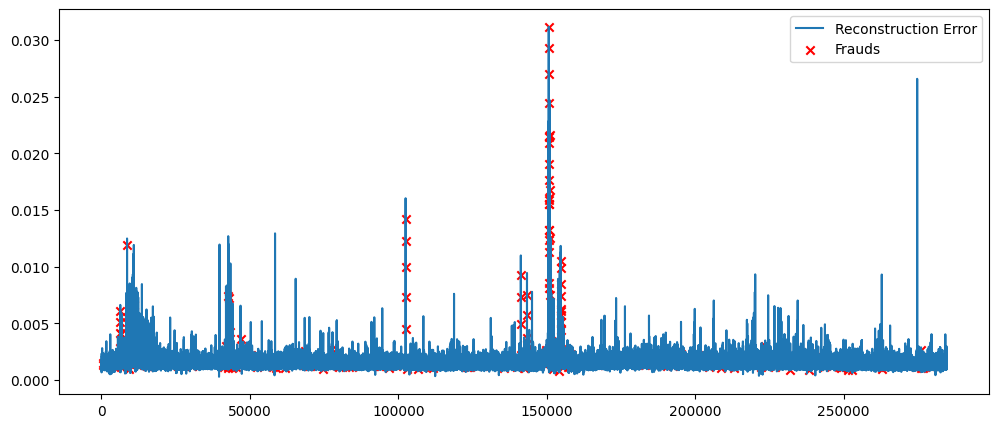

In [20]:
import numpy as np
import matplotlib.pyplot as plt

errors = np.load("../outputs/errors.npy")
y = np.load("../outputs/sequence_labels.npy")

plt.figure(figsize=(12,5))
plt.plot(errors, label="Reconstruction Error")
plt.scatter(np.where(y==1), errors[y==1], color='r', marker='x', label="Frauds")
plt.legend()
plt.show()


Epoch [1/5], Loss: 0.003029
Epoch [2/5], Loss: 0.001634
Epoch [3/5], Loss: 0.001584
Epoch [4/5], Loss: 0.001535
Epoch [5/5], Loss: 0.001488


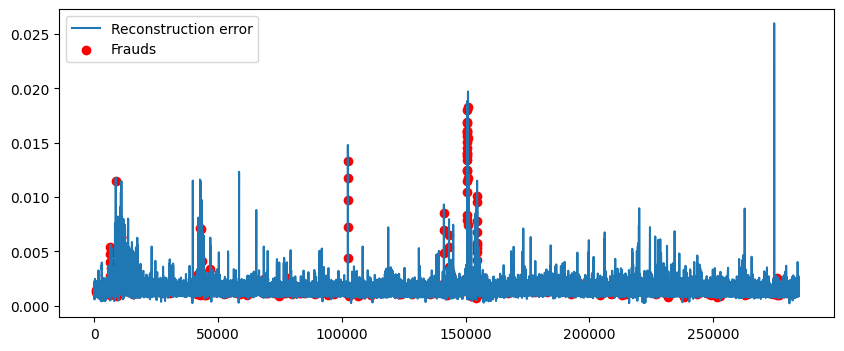

In [22]:
from src.data_preparation import load_preprocess_data, create_sequences
from src.train import train_model
from src.detect import compute_reconstruction_errors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Load & preprocess
scaler, data_scaled, labels = load_preprocess_data("C:/Users/Lenovo/Desktop/financial-anomaly-lstm-autoencoder/data/raw/creditcard.csv")
X, y = create_sequences(data_scaled, labels, seq_length=10)

# Only train on normal transactions
X_train = X[y == 0]

# Train model
model = train_model(X_train, num_epochs=5)

# Compute reconstruction errors on all data
errors = compute_reconstruction_errors(model, X)

# Plot errors vs true frauds
plt.figure(figsize=(10,4))
plt.plot(errors, label="Reconstruction error")
plt.scatter(np.where(y==1), errors[y==1], color='r', label="Frauds")
plt.legend()
plt.show()



In [23]:
threshold = np.percentile(errors, 95)
predicted = (errors > threshold).astype(int)

precision = precision_score(y, predicted)
recall = recall_score(y, predicted)
f1 = f1_score(y, predicted)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y, predicted))

Precision: 0.0070
Recall: 0.2012
F1 Score: 0.0134
Confusion Matrix:
[[270164  14141]
 [   393     99]]


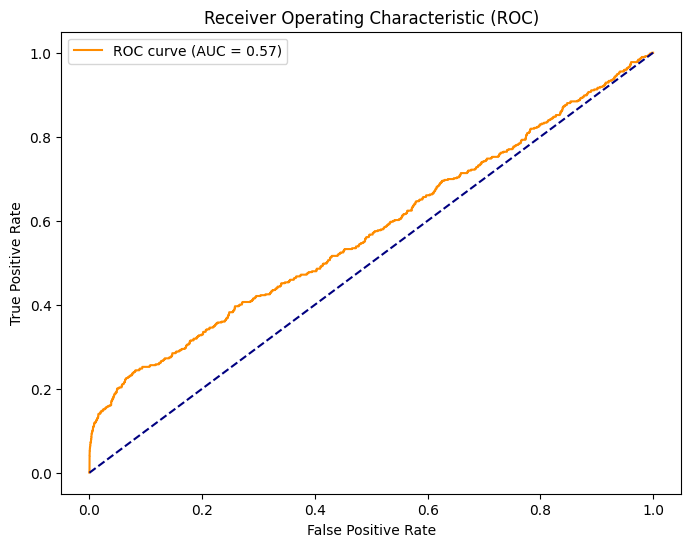

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, errors)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()


In [30]:
model.state_dict()

OrderedDict([('encoder.weight_ih_l0',
              tensor([[ 0.0614, -0.0286,  0.0697,  ..., -0.0130,  0.0446,  0.0454],
                      [-0.0835,  0.0687,  0.1793,  ...,  0.0710,  0.0184,  0.3125],
                      [ 0.2835,  0.0055,  0.0233,  ...,  0.1612,  0.0451, -0.1071],
                      ...,
                      [-0.2886,  0.3333,  0.2653,  ...,  0.2444,  0.2986, -0.2808],
                      [-0.2048,  0.1516,  0.1241,  ..., -0.0684,  0.0499, -0.0135],
                      [ 0.0132,  0.0827,  0.1971,  ...,  0.1051,  0.1957, -0.0379]],
                     device='cuda:0')),
             ('encoder.weight_hh_l0',
              tensor([[-0.0466,  0.0496,  0.0566,  ...,  0.0680, -0.0379, -0.0088],
                      [ 0.0439,  0.1117,  0.0231,  ...,  0.0799,  0.0993, -0.0614],
                      [-0.0210,  0.1360,  0.0438,  ...,  0.1808,  0.0518,  0.0798],
                      ...,
                      [ 0.0262,  0.0066, -0.1059,  ...,  0.0410,  0.0158,

In [35]:
import torch
import os

os.makedirs("financial-anomaly-lstm-autoencoder/outputs/models", exist_ok=True)


In [37]:
torch.save(model.state_dict(), "../outputs/models/lstm_autoencoder.pth")
